# Purpose
This notebook will provide an illustration of a discrete choice model that tries to estimate causal effects, without making use of the framework outlined in Brathwaite and Walker (2018).
The study of note is
> Chiara, Giacomo Dalla, Lynette Cheah, Carlos Lima Azevedo, and Moshe E. Ben-Akiva. "A Policy-Sensitive Model of Parking Choice for Commercial Vehicles in Urban Areas." Transportation Science (2020).

In this notebook we draw the causal diagram that we believes corresponds to the parking choice model in Chiara et al (2020).
We then point out some tests that could have been done and should be presented to justify this paper's causal model and its implicit assumptions, even before estimating parameters of the proposed choice models.
Finally, we will:
- note the importance of these implicit assumptions, and
- show how this study may present a real example of our simplified demsonstration of how incorrect causal graphs can lead to highly inaccurate causal effect estimates, even in selection-on-observables settings.


In [1]:
import os
import sys

# Local modules
sys.path.insert(0, "../../src")
from graphs import parking  # noqa: E402 isort:skip


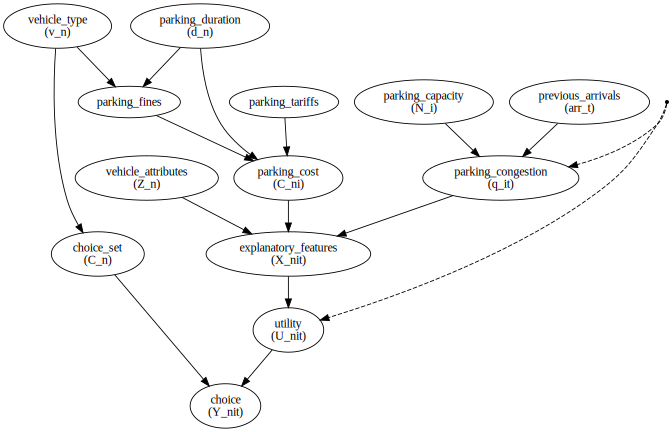

In [2]:
causal_graph = parking.PARKING_CAUSAL_MODEL.draw()
causal_graph.graph_attr.update(size="10,6")
causal_graph

# Issues
As usual, the immediate and general question is whether this causal model is credible.
That is,
1. Are the model's testable implications are supported by the author's dataset?
2. Are the untestable assumptions plausible?

These two issues will be expounded on below.

## 1. Structure of the observables
As good practice, one should test each and every testable implication of one's model.

However, the implications / assumptions related to one's study's interventions are likely to be most important.
In particular, the authors consider policy interventions that set or alter:
- parking capacity
- parking duration
- parking tariffs
- parking fines

One is led to immediately wonder
   1. how might parking duration relate to parking tariffs and vehicle attributes such as the type of vehicle owner (e.g. large corporation vs independent truck owner) and the type of goods being transported (large heavy loads vs small loads)?
   2. are there may be unobserved confounders that lead to loading or unloading delays for all drivers at a particular parking facility (e.g. a closed ramp), thus affecting both parking congestion and parking duration?
   3. at locations with higher parking tariffs, will drivers and workers experience greater incentive to minimize parking duration to avoid higher costs?

Chiara et al., state that they tread parking duration as "exogenous and known by the driver before making a parking choice" (p. 7).
**Given the concerns in the preceding paragraph, assuming that parking duration is exogeneous is a-priori suspect.**
The causal graph above suggests testing this assumption by attempting to falsify the implicit assumptions of marginal independence between parking duration and:
- vehicle attributes ($Z_n$)
- parking tariffs
- parking congestion ($q_{it}$)

The exogeneity assumption is crucially important, as noted by Chiara et al.
From a statistical perspective, the authors note on page 14 that,
> One necessary condition to obtain unbiased estimates of the unknown parameters is the exogeneity of the explana-tory variables.
Whenever an observable covariate is correlated with unobserved factors contained in the error term (hence its endogeneity), its coefficient estimate will capture not only the effect of the variable itself but also the effect of the correlated unobservedfactors on the utility (Train, 2003).

From a causal perspective, the causal effect of the author's considered policy interventions depends on the assumed causal relationships.
**If parking duration is partially caused by parking tariffs, then the estimated causal effects of changing parking tariffs may be highly inaccurate because these downstream effects were ignored.**
The harmful effects of ignoring downstream changes that occur from intervening on an upstream variable is demonstrated in the first part of our work.

Moreover, if parking duration is partially caused by vehicle attributes such as the type of goods being transported, then **the considered interventions that limit parking durations to a given time may be unrealistic (i.e., not useful).**
For instance, there may be physical limits to how low one's parking duration can be, given the type and quantity of goods being delivered or picked-up.
In such a case, the simulated interventions are unlikely to be feasible in reality.

## 2. Structure of unobservables
Chiara et al. are concerned about latent confounding / endogeneity of parking congestion and utility.
To deal with this problem, they assume that parking arrivals in the previous time period $(t, t-1h)$ is an instrumental variable.
Note that time is presumably being measured in hours.

To be explicit, by assuming that parking arrivals in the previous hour is an instrumental variable, Chiara et al. assume that
1. parking arrivals in the previous hour is not caused by the same unobserved confounders that cause parking congestion in the current hour,
2. parking arrivals in the previous hour cause (or are associated with) parking congestion in the current hour,
3. the utility of parking at a given location is independent of parking arrivals in the previous hour, conditional on parking congestion

However, the assumption that parking arrivals in the previous hour is not caused by the same unobserved confounders that cause parking congestion in the current hour is a-priori suspect.
Chiara et al. hypothesize that the unobserved confounders include "factors such as a temporary closure of a road lane or the passage of a police car" (p. 14).
If for instance, a roadway or lane is closed due to construction, such a closure may last for multiple hours or even days.
In such a case, the unobserved confounders would affect not just parking congestion in the current hour, but arrivals to the parking facility in the previous hour as well.

Given the situation described in the preceding paragraph, **the parking arrivals in the previous hour do not appear to meet the conditions of an instrumental variable**, thus decreasing or invalidating the credibility of the control function approach used in the article.

This issue is an example of the old adage that "good [or valid] instruments are hard to find."

More generally, this directly relates to the second point in our work, that **dealing with unobserved confounding in observational studies is an open and difficult problem.**